In [2]:
import numpy as np
import pandas as pd
from numba import njit
import matplotlib.pyplot as plt
import os
import glob
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,8)

In [ ]:
file_name = '/groups/sxs/hchaudha/new_gauge_condition/runs/ab_mass_ratio_1_ns_dump_data/Ev/Lev1_AA/Run/TStepperDiag.dat'

In [4]:
def read_dat_file(file_name):
  cols_names = []

  temp_file = "./temp.csv"
  with open(file_name,'r') as f:
    with open(temp_file,'w') as w:
      lines = f.readlines()
      for line in lines:
        if(line[0] != '#'): # This is data
          w.writelines(line)
        if(line[0:3] == '# ['): # Some dat files have comments on the top
          cols_names.append(line.split('=')[-1][1:-1].strip())


  return pd.read_csv(temp_file,delim_whitespace=True,names=cols_names)

In [ ]:
read_dat_file(file_name)

# Plot a single dat file

### Read dat file into a pandas object

In [37]:
def read_dat_file(file_name):
  cols_names = []

  temp_file = "./temp.csv"
  with open(file_name,'r') as f:
    with open(temp_file,'w') as w:
      lines = f.readlines()
      for line in lines:
        if(line[0] != '#'): # This is data
          w.writelines(line)
        if(line[0:3] == '# ['): # Some dat files have comments on the top
          cols_names.append(line.split('=')[-1][1:-1].strip())


  return pd.read_csv(temp_file,delim_whitespace=True,names=cols_names)

def plot_and_save(data,x_arr,y_arr,file_location):
  for x_axis,y_axis in zip(x_arr,y_arr):
    plt.plot(data[x_axis],data[y_axis])
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    title = file_location.split("/")[-1][:-4]+" \""+y_axis+"\" vs \""+x_axis+"\""
    plt.title(title)

    plt.savefig(file_location[:-4]+"_\""+y_axis+"\"_vs_\""+x_axis+"\"")

In [39]:
file_location = "/panfs/ds09/sxs/himanshu/gauge_stuff/debug_gauge/runs_with_different_scale/corotating_50_50_0/Ev/Lev1_AA/Run/ConstraintNorms/GhCe_Linf.dat"
data = read_dat_file(file_location)
data.columns

Index(['time', 'Linf(GhCe) on SphereA0', 'Linf(GhCe) on SphereA1',
       'Linf(GhCe) on SphereA2', 'Linf(GhCe) on SphereA3',
       'Linf(GhCe) on SphereB0', 'Linf(GhCe) on SphereB1',
       'Linf(GhCe) on SphereB2', 'Linf(GhCe) on SphereB3',
       'Linf(GhCe) on SphereC0', 'Linf(GhCe) on SphereC1',
       'Linf(GhCe) on SphereC2', 'Linf(GhCe) on SphereC3',
       'Linf(GhCe) on SphereC4', 'Linf(GhCe) on SphereC5',
       'Linf(GhCe) on SphereC6', 'Linf(GhCe) on SphereC7',
       'Linf(GhCe) on SphereC8', 'Linf(GhCe) on SphereC9',
       'Linf(GhCe) on SphereC10', 'Linf(GhCe) on SphereC11',
       'Linf(GhCe) on SphereC12', 'Linf(GhCe) on SphereC13',
       'Linf(GhCe) on SphereC14', 'Linf(GhCe) on SphereC15',
       'Linf(GhCe) on SphereC16', 'Linf(GhCe) on SphereC17',
       'Linf(GhCe) on SphereC18', 'Linf(GhCe) on SphereC19',
       'Linf(GhCe) on SphereC20', 'Linf(GhCe) on SphereC21',
       'Linf(GhCe) on SphereC22', 'Linf(GhCe) on SphereC23',
       'Linf(GhCe) on SphereC24', 

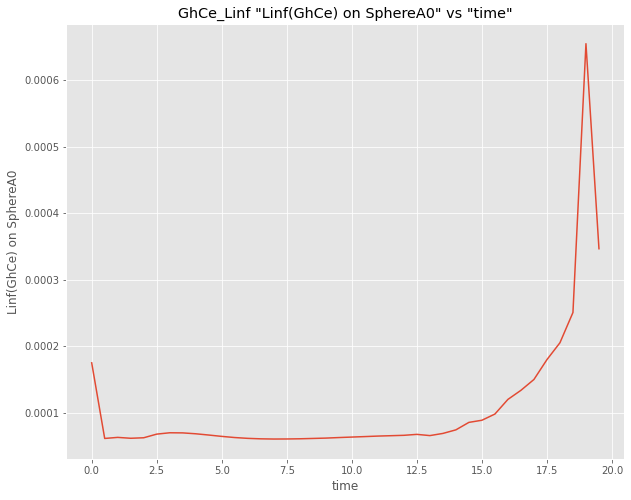

In [40]:
plot_and_save(data,['time'], ['Linf(GhCe) on SphereA0'],file_location)

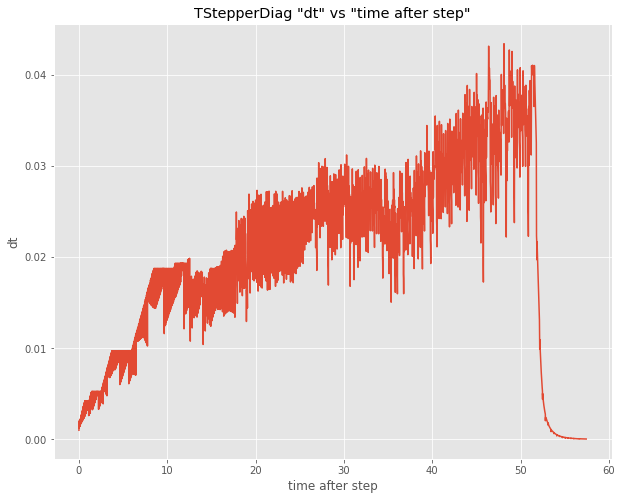

In [34]:
x_axis = 'time after step'
y_axis = 'dt'
plt.plot(data[x_axis],data[y_axis])
plt.xlabel(x_axis)
plt.ylabel(y_axis)
title = file_location.split("/")[-1][:-4]+" \""+y_axis+"\" vs \""+x_axis+"\""
plt.title(title)

plt.savefig(file_location[:-4]+"_\""+y_axis+"\"_vs_\""+x_axis+"\"")

In [29]:
file_location.split("/")[:-1]

['',
 'panfs',
 'ds09',
 'sxs',
 'himanshu',
 'gauge_stuff',
 'debug_gauge',
 'runs_with_different_scale',
 'corotating_50_50_0',
 'Ev',
 'Lev1_AA',
 'Run']

## Find files

In [ ]:
folder_path = "/groups/sxs/hchaudha/new_gauge_condition/runs/ab_mr10_ns_dump_data_dH"

# # With ringdowns
# lev_golb=folder_path+"/Ev/Lev**"

# Without ringdowns
lev_golb=folder_path+"/Ev/Lev?_??"

dat_files_glob=lev_golb+"/Run/**/**.dat"



In [ ]:

a = "/groups/sxs/hchaudha/new_gauge_condition/runs/ng_mass_ratio_1_ns_dump_data/Ev/Lev1_AA/Run/GrAdjustSubChunksToDampingTimes.dat"
a[:46]+a[49:]

In [ ]:

path_pattern = dat_files_glob
ng_path_collection = []
path_collection = []


for folder_name in glob.iglob(path_pattern, recursive=True):
    if os.path.isdir(folder_name) or os.path.isfile(folder_name):
        ng_path_collection.append(folder_name)
        path_collection.append(folder_name[:46]+folder_name[49:])
        print(folder_name.split("/")[-1])



## Saves a plot for all the varibles in a dat file
def plot_vars_from_a_dat_file(file_path,ng_file_path,save_folder="/groups/sxs/hchaudha/new_gauge_condition/plots/comparison_plots/"):
  print("Saved folder: "+ save_folder)
  corotating_data = read_dat_file(ng_file_path)
  dh_gauge_data = read_dat_file(file_path)
  col_names = dh_gauge_data.columns[1:]
  for var in col_names:
    plt.plot(corotating_data[dh_gauge_data.columns[0]],corotating_data[var],label='corotating_gauge')
    plt.plot(dh_gauge_data[dh_gauge_data.columns[0]],dh_gauge_data[var],label='dh_gauge')
    plt.legend()
    plt.title(file_path.split("/")[-1][:-3]+var)
    save_file_name = file_path.split("/")[-1][:-4]+"__"+var+".png"
    save_file_name = save_file_name.replace("/","_") # Replace all the / in the file names as they will cause errors
    plt.xlabel("Time(M)")
    plt.ylabel(var)
    plt.savefig(save_folder+save_file_name)
    plt.clf()
    print("Saved: "+file_path.split("/")[-1][:-4]+"__"+var)




In [ ]:
skip_files  = ["MemoryInfo.dat","TimeInfo.dat"]
for i in range(len(path_collection)):

  if(path_collection[i].split("/")[-1] in skip_files):
    print("\nSkipped: ", path_collection[i],"\n")
    continue
  print("\nSaving: ", path_collection[i],"\n")
  plot_vars_from_a_dat_file(path_collection[i],ng_path_collection[i])

# Plot all the dat files for comparison

In [ ]:

folder_path = "/groups/sxs/hchaudha/new_gauge_condition/runs/ab_mr10_ns_dump_data_dH"
lev_golb=folder_path+"/Ev/Lev1_AA"
dat_files_glob=lev_golb+"/Run/**/**.dat"
path_pattern = dat_files_glob

path_collection_1 = []
for folder_name in glob.iglob(path_pattern, recursive=True):
    if os.path.isdir(folder_name) or os.path.isfile(folder_name):
        path_collection_1.append(folder_name)
        print(folder_name.split("/")[-1])


folder_path = "/groups/sxs/hchaudha/new_gauge_condition/runs/mass_ratio_10_non_spinning"
lev_golb=folder_path+"/Ev/Lev1_AA"
dat_files_glob=lev_golb+"/Run/**/**.dat"
path_pattern = dat_files_glob


path_collection_2 = []
for folder_name in glob.iglob(path_pattern, recursive=True):
    if os.path.isdir(folder_name) or os.path.isfile(folder_name):
        path_collection_2.append(folder_name)
        print(folder_name.split("/")[-1])


## Saves a plot for all the varibles in a dat file
def plot_vars_from_a_dat_file2(file_path,file_path_correct,save_folder="/groups/sxs/hchaudha/new_gauge_condition/plots/mr10_comparison_plot/"):
  print("Saved folder: "+ save_folder)
  correct_data = read_dat_file(file_path_correct)
  wrong_data = read_dat_file(file_path)
  col_names = wrong_data.columns[1:]
  for var in col_names:
    plt.plot(correct_data[wrong_data.columns[0]],correct_data[var],label='dh_gauge')
    plt.plot(wrong_data[wrong_data.columns[0]],wrong_data[var],label='analytical_shift')
    plt.legend()
    plt.title(file_path.split("/")[-1][:-3]+var)
    save_file_name = file_path.split("/")[-1][:-4]+"__"+var+".png"
    save_file_name = save_file_name.replace("/","_") # Replace all the / in the file names as they will cause errors
    plt.xlabel("Time(M)")
    plt.ylabel(var)
    plt.savefig(save_folder+save_file_name)
    plt.clf()
    print("Saved: "+file_path.split("/")[-1][:-4]+"__"+var)


In [ ]:
skip_files  = ["MemoryInfo.dat","TimeInfo.dat"]
for i in range(len(path_collection_1)):

  if(path_collection_1[i].split("/")[-1] in skip_files):
    print("\nSkipped: ", path_collection_1[i],"\n")
    continue
  print("\nSaving: ", path_collection_1[i],"\n")
  plot_vars_from_a_dat_file(path_collection_1[i],path_collection_2[i])

In [ ]:
"TStepperDiag__error/1e-08.png".replace("/","_")

In [ ]:
len(path_collection)

### Dat file plots

In [ ]:
ng_file_path="/groups/sxs/hchaudha/new_gauge_condition/runs/ng_mass_ratio_1_ns_dump_data/Ev/Lev1_AA/Run/DiagAhSpeedA.dat"
file_path="/groups/sxs/hchaudha/new_gauge_condition/runs/mass_ratio_1_ns_dump_data/Ev/Lev1_AA/Run/DiagAhSpeedA.dat"

time_step_data = read_dat_file(file_path)
time_step_data.columns

time_step_data_dh = read_dat_file(ng_file_path)
time_step_data_dh.columns

In [ ]:
var = 'MinDeltaR0'
plt.plot(time_step_data['time'],time_step_data[var],label='corotating')
plt.plot(time_step_data_dh['time'],time_step_data_dh[var],label='current_gauge')
plt.legend()

In [ ]:
var = 'L2(GhCe)'
var = 'VolLp(GhCe)'
# var = 'Linf(GhCe)'
plt.plot(time_step_data['time '],time_step_data[var],label='corotating')
plt.plot(time_step_data_dh['time '],time_step_data_dh[var],label='current_gauge')
plt.legend()

In [ ]:
file_path="/groups/sxs/hchaudha/new_gauge_condition/runs/ng_mass_ratio_1_ns_roll_off_500_dump_data/Ev/Lev1_AC/Run/TStepperDiag.dat"

time_step_data = read_dat_file(file_path)
time_step_data.columns

In [ ]:
plt.plot(time_step_data['time after step'],time_step_data['dt'])
plt.xlabel('time after step')
plt.ylabel('dt')
plt.savefig("/groups/sxs/hchaudha/new_gauge_condition/analysis/report/ng_ms1_nr_roll_off500_lec3c.png")

In [ ]:
AhA = read_dat_file("/groups/sxs/hchaudha/new_gauge_condition/runs/ng_mass_ratio_1_non_spinning/Ev/Lev1_AA/Run/ApparentHorizons/AhA.dat")

In [ ]:
root_folders = {"/groups/sxs/hchaudha/new_gauge_condition/runs/ng_mass_ratio_10_non_spinning",
"/groups/sxs/hchaudha/new_gauge_condition/runs/ng_mass_ratio_1_non_spinning",
"/groups/sxs/hchaudha/new_gauge_condition/runs/ng_mass_ratio_1_non_spinning_new",
"/groups/sxs/hchaudha/new_gauge_condition/runs/ng_mass_ratio_1_one_high_spinning_correct"}


In [ ]:
ng_mr_10_non_spinning = read_dat_file("/groups/sxs/hchaudha/new_gauge_condition/runs/ng_mass_ratio_10_non_spinning/Ev/Lev3_AA/Run/ConstraintNorms/GhCeExt_L2.dat")
ng_mr_1_non_spinning = read_dat_file("/groups/sxs/hchaudha/new_gauge_condition/runs/ng_mass_ratio_1_non_spinning/Ev/Lev3_AA/Run/ConstraintNorms/GhCeExt_L2.dat")
ng_mr_1_one_high_spinning_correct = read_dat_file("/groups/sxs/hchaudha/new_gauge_condition/runs/ng_mass_ratio_1_one_high_spinning_correct/Ev/Lev3_AA/Run/ConstraintNorms/GhCeExt_L2.dat")

In [ ]:
mr_10_non_spinning = read_dat_file("/groups/sxs/hchaudha/new_gauge_condition/runs/mass_ratio_10_non_spinning/Ev/Lev3_AA/Run/ConstraintNorms/GhCeExt_L2.dat")
mr_1_non_spinning = read_dat_file("/groups/sxs/hchaudha/new_gauge_condition/runs/mass_ratio_1_non_spinning/Ev/Lev3_AA/Run/ConstraintNorms/GhCeExt_L2.dat")
mr_1_one_high_spinning_correct = read_dat_file("/groups/sxs/hchaudha/new_gauge_condition/runs/mass_ratio_1_one_high_spinning_correct/Ev/Lev3_AA/Run/ConstraintNorms/GhCeExt_L2.dat")

In [ ]:
ng_runs = [ng_mr_10_non_spinning,ng_mr_1_non_spinning,ng_mr_1_one_high_spinning_correct]
ng_runs = [ng_mr_1_non_spinning]
og_runs = [mr_1_non_spinning,mr_1_one_high_spinning_correct]
og_runs = [mr_1_one_high_spinning_correct]
combined = ng_runs + og_runs
# ng_mr_1_non_spinning.columns

In [ ]:
final_time = 200
for datasets in combined:
  plt.plot(datasets['time '][:final_time],datasets['L2(GhCeExt) on SphereB0'][:final_time])

plt.title("'L2(GhCeExt) on SphereB0'")
plt.legend(["ng_mr1","mr1"])
plt.xlabel("Time")
plt.ylabel("'L2(GhCeExt) on SphereB0'")
plt.savefig("/groups/sxs/hchaudha/new_gauge_condition/analysis/report/L2(GhCeExt) on SphereB0_lev_3.png")

In [ ]:
final_time = 2000
for datasets in og_runs:
  plt.plot(datasets['time after step'][:final_time],datasets['dt'][:final_time])

plt.legend(["mr10","mr1","mr1_hs"])
plt.xlabel("Time")
plt.ylabel("dt")
plt.savefig("/groups/sxs/hchaudha/new_gauge_condition/analysis/report/current_gauge_dt_vs_T.png")

In [ ]:
ng_runs_lev2 = [read_dat_file("/groups/sxs/hchaudha/new_gauge_condition/runs/ng_mass_ratio_10_non_spinning/Ev/Lev2_AA/Run/TStepperDiag.dat"),
                read_dat_file("/groups/sxs/hchaudha/new_gauge_condition/runs/ng_mass_ratio_1_non_spinning/Ev/Lev2_AA/Run/TStepperDiag.dat"),
                read_dat_file("/groups/sxs/hchaudha/new_gauge_condition/runs/ng_mass_ratio_1_one_high_spinning_correct/Ev/Lev2_AA/Run/TStepperDiag.dat")]
ng_runs_lev3 = [read_dat_file("/groups/sxs/hchaudha/new_gauge_condition/runs/ng_mass_ratio_10_non_spinning/Ev/Lev3_AA/Run/TStepperDiag.dat"),
                read_dat_file("/groups/sxs/hchaudha/new_gauge_condition/runs/ng_mass_ratio_1_non_spinning/Ev/Lev3_AA/Run/TStepperDiag.dat"),
                read_dat_file("/groups/sxs/hchaudha/new_gauge_condition/runs/ng_mass_ratio_1_one_high_spinning_correct/Ev/Lev3_AA/Run/TStepperDiag.dat")]

In [ ]:
for datasets in ng_runs_lev2:
  plt.plot(datasets['time after step'],datasets['dt'])

plt.title("NG Lev2")
plt.legend(["ng_mr10","ng_mr1","ng_mr1_hs"])
plt.xlabel("Time")
plt.ylabel("dt")
plt.savefig("/groups/sxs/hchaudha/new_gauge_condition/analysis/report/rot_frame_beta_gauge_lev2_dt_vs_T.png")

In [ ]:
for datasets in ng_runs_lev3:
  plt.plot(datasets['time after step'],datasets['dt'])

plt.title("NG Lev3")
plt.legend(["ng_mr10","ng_mr1","ng_mr1_hs"])
plt.xlabel("Time")
plt.ylabel("dt")
plt.savefig("/groups/sxs/hchaudha/new_gauge_condition/analysis/report/rot_frame_beta_gauge_lev3_dt_vs_T.png")

## Read hist files

In [ ]:

def list_to_csv(list):
  csv_line = ""
  for i in list:
    csv_line = csv_line + i + ","
  return csv_line[:-2]+"\n"

def extract_data(line):
  data = []
  col_elements = line.split(";")[:-1]
  for i in col_elements:
    data.append(i.split("=")[1])
  return data

def col_names(first_line):
  col_name_list = []
  col_elements = first_line.split(";")[:-1]
  for i in col_elements:
    col_name_list.append(i.split("=")[0].strip())
  return col_name_list

def read_hist_file(file_name):
  cols_names = []
  temp_file = file_name[:-3]+"csv"
  with open(file_name,'r') as f:
    with open(temp_file,'w') as w:
      lines = f.readlines()
      # Write the column names
      cols_names = col_names(lines[0])
      w.writelines(list_to_csv(cols_names))

      for line in lines:
        w.writelines(list_to_csv(extract_data(line)))

  return pd.read_csv(temp_file,delimiter=',')


In [ ]:
file_name = "/groups/sxs/hchaudha/new_gauge_condition/runs/ng_mass_ratio_1_non_spinning/Ev/Lev1_AA/Run/Hist-FuncQuatRotMatrix.txt"
quat_rot_mat_data=read_hist_file(file_name)
quat_rot_mat_data

In [ ]:
quat_rot_mat_data.plot('t',['Quat3','Quat2'])

In [ ]:
quat_rot_mat_data.columns